In [1]:
from cProfile import label

from fontTools.misc.bezierTools import calcQuadraticArcLength

'''
Assignment 2
Student: NAME SURNAME
'''

# *** Packages ***
#!pip install torch==2.4 # Run just once
import torch.nn as nn
import torch.nn.functional as F
from math import floor
import torch

if __name__ == "__main__":
    # Write your code here
    print("Hello World!")

    '''
    DON'T MODIFY THE SEED!
    '''
    # Set the seed for reproducibility
    manual_seed = 42
    torch.manual_seed(manual_seed)

Hello World!


In [2]:
manual_seed = 42
torch.manual_seed(manual_seed)
# first dimension stay equal, second value change
torch.randint(1, 10 , (1,1))

tensor([[7]])

In [25]:
import torchvision.datasets as datasets
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

# Q4 - Normalize data
transformer = transforms.Compose([transforms.ToTensor(), transforms.Normalize(mean=0, std=1)])

trainset = datasets.CIFAR10(root='./data', train=True,download=True, transform=transformer)
testset = datasets.CIFAR10(root='./data', train=False,download=True, transform=transformer)

Files already downloaded and verified
Files already downloaded and verified


In [18]:
batch_size = 32
trainloader = DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = DataLoader(testset, batch_size=len(testset))

In [28]:
import torchvision

classes = ('plane', 'car', 'bird', 'cat','deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')
    plt.show()

dist_train_classes = dict.fromkeys(classes, 0)
dist_test_classes = dict.fromkeys(classes, 0)
img_list = []
class_list = []

#for j in range(len(testloader)):
dataiter = iter(testloader)
for i in range(batch_size):
    images, labels = next(dataiter)
    current_class = classes[labels[i].item()]
    
    dist_test_classes[current_class] = dist_test_classes[current_class] + 1

for j in range(len(trainloader)):
    dataiter = iter(trainloader)
    for i in range(batch_size):
        images, labels = next(dataiter)
        current_class = classes[labels[i].item()]
        
        if dist_train_classes[current_class] == 0:
            img_list.append(images[i])
            class_list.append(current_class)
        
        dist_train_classes[current_class] = dist_train_classes[current_class] + 1
        
imshow(torchvision.utils.make_grid(img_list))
print(f"Classes: {class_list}")

StopIteration: 

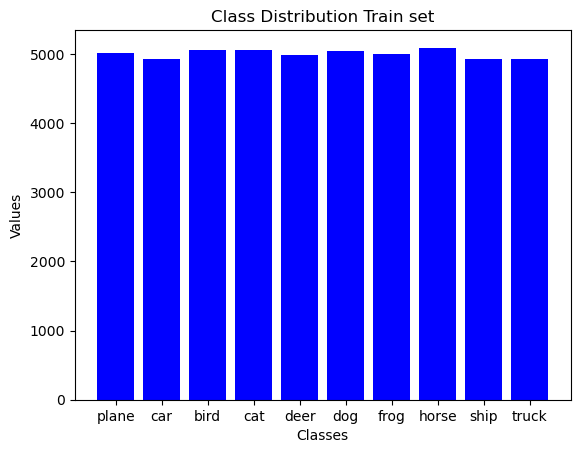

In [7]:
# Extract keys and values for plotting
keys = list(dist_train_classes.keys())
values = list(dist_train_classes.values())

# Create the histogram
plt.bar(keys, values, color='blue')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Values')
plt.title('Class Distribution Train set')

# Show the plot
plt.show()

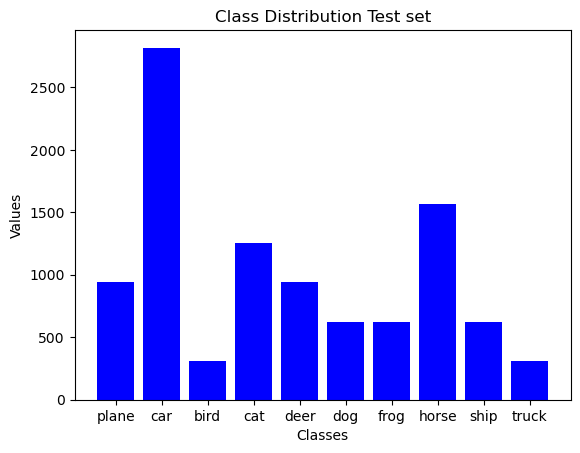

In [8]:
# Extract keys and values for plotting
keys = list(dist_test_classes.keys())
values = list(dist_test_classes.values())

# Create the histogram
plt.bar(keys, values, color='blue')

# Add labels and title
plt.xlabel('Classes')
plt.ylabel('Values')
plt.title('Class Distribution Test set')

# Show the plot
plt.show()

In [19]:
# Q3 - cast images
# we want a 3x32x32 => 3 channels, 32 width, 32 height
dataiter = iter(testloader)
images, labels = next(dataiter)

# [batch size, channels, height, width]
print(images.shape)
print(images[0].shape)

torch.Size([32, 3, 32, 32])
torch.Size([3, 32, 32])


In [20]:
# Q5 - Make validation
validset, testset = torch.utils.data.random_split(testset, [0.5, 0.5])
testloader = DataLoader(testset, batch_size=len(testset))
validloader = DataLoader(validset, batch_size=len(validset))
print("We have", len(validset), "items for validation and", len(testset), "items for test")

We have 5000 items for validation and 5000 items for test


In [21]:
# Q6 - CNN
def out_dimensions(conv_layer, h_in, w_in):
    '''
    This function computes the output dimension of each convolutional layers in the most general way. 
    '''
    h_out = floor((h_in + 2 * conv_layer.padding[0] - conv_layer.dilation[0] * (conv_layer.kernel_size[0] - 1) - 1) /
                  conv_layer.stride[0] + 1)
    w_out = floor((w_in + 2 * conv_layer.padding[1] - conv_layer.dilation[1] * (conv_layer.kernel_size[1] - 1) - 1) /
                  conv_layer.stride[1] + 1)
    return h_out, w_out
    
# You can start by modifying what we have done in class, or define your model from scratch
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=(3, 3), padding=0, stride=1)
        h_out, w_out = out_dimensions(self.conv1, 32, 32)
        self.conv2 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=0, stride=1) 
        h_out, w_out = out_dimensions(self.conv2, h_out, w_out)
        
        self.pool1 = nn.MaxPool2d(2, 2)
        h_out, w_out = int(h_out/2), int(w_out/2)
        
        self.conv3 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(3, 3), padding=0, stride=1) 
        h_out, w_out = out_dimensions(self.conv3, h_out, w_out)
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=128, kernel_size=(3, 3), padding=0, stride=1) 
        h_out, w_out = out_dimensions(self.conv5, h_out, w_out)
        h_out, w_out = int(h_out/2), int(w_out/2)
        
        self.conv6 = nn.Conv2d(in_channels=128, out_channels=32, kernel_size=(3, 3), padding=0, stride=1) 
        h_out, w_out = out_dimensions(self.conv6, h_out, w_out)
        h_out, w_out = int(h_out/2), int(w_out/2)
        
        # You can double this block! 
        self.fc1 = nn.Linear(32 * h_out * w_out, 10) # What does 32 represent?
        # You can add one fully connected layer. What do you have to change?
        self.dimensions_final = (32, h_out, w_out)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv3(x)
        x = self.conv5(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        x = self.conv6(x)
        x = F.relu(x)
        x = self.pool1(x)
        
        n_channels, h, w = self.dimensions_final
        x = x.view(-1, n_channels * h * w)
        x = self.fc1(x)
        return x
    
class CCNS(nn.Module):
    def __init__(self):
        super(CCNS, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=(3, 3), padding=0, stride=1)
        h_out, w_out = out_dimensions(self.conv1, 32, 32)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), padding=0, stride=1)
        h_out, w_out = out_dimensions(self.conv2, h_out, w_out)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(2, 2)
        h_out, w_out = int(h_out/2), int(w_out/2)
        
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(3, 3), padding=0, stride=1)
        h_out, w_out = out_dimensions(self.conv3, h_out, w_out)
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=32, kernel_size=(3, 3), padding=0, stride=1)
        h_out, w_out = out_dimensions(self.conv4, h_out, w_out)
        h_out, w_out = int(h_out/2), int(w_out/2)
        
        self.fc1 = nn.Linear(32 * h_out * w_out, 10)
        self.dimensions_final = (32, h_out, w_out)

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.relu1(x)
        x = self.pool1(x)
        
        n_channels, h, w = self.dimensions_final
        x = x.view(-1, n_channels * h * w)
        x = self.fc1(x)
        
        return x

In [22]:
#Q7 - Training
import torch.optim as optim

model = CNN()
learning_rate = 0.031
n_epochs = 4 #7 might overfit but can be a minimum(?)
optimizer = optim.SGD(model.parameters(), lr=learning_rate)
loss_fn = nn.CrossEntropyLoss()

In [23]:
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'mps' 
    if torch.backends.mps.is_available() else 'cpu')
model = model.to(DEVICE)
print("Working on", DEVICE)

train_loss_list = []
validation_loss_list = []
for epoch in range(n_epochs):
    loss_train = 0
    for data, target in trainloader:
        # Set the model in training mode
        model.train()
        data, target = data.to(DEVICE), target.to(DEVICE)
        # Set the gradient to 0
        optimizer.zero_grad()
        # Make a prediction
        output = model(data)
        # Compute the loss function
        loss = loss_fn(output, target)
        loss_train += loss.item()
        # Backpropagation
        loss.backward()
        # Update parameters
        optimizer.step()
        
    loss_train = loss_train / len(trainloader) # Consider this alternative method of tracking training loss. 
    train_loss_list.append(loss_train)
    
    # At the end of every epoch, check the validation loss value
    with torch.no_grad():
        model.eval()
        for data, target in validloader: # Just one batch
            data, target = data.to(DEVICE), target.to(DEVICE)
            # Make a prediction
            output = model(data)
            # Compute the loss function
            validation_loss = loss_fn(output, target).item()
            print(f"Epoch {epoch + 1}: Train loss: {loss_train}, Validation loss {validation_loss}")
            validation_loss_list.append(validation_loss)
    

Working on mps
Epoch 1: Train loss: 2.0732645710843234, Validation loss 1.7527580261230469
Epoch 2: Train loss: 1.5938730786339412, Validation loss 1.5248535871505737
Epoch 3: Train loss: 1.33492541046228, Validation loss 1.2926243543624878
Epoch 4: Train loss: 1.156615661415471, Validation loss 1.1065880060195923


Using more than 4 epochs lead to overfitting, if we try with 15 epochs we can easly see that the loss during training will decrease for each epochs while the validation loss continue to go up and down showing a overfitting. 

Using a very high learning rate cause the training loss to decrease while validation loss will continue to increase, a very small learning rate will lead to a good accuracy after a lot of epochs.

i tried to add  more conv layer consecutively but it get worse, too loss of information (?), adding more layers is counter productive because it will need more epochs to have a good loss (tried 3 layers of 2 conv with relu and max but go overfitting)

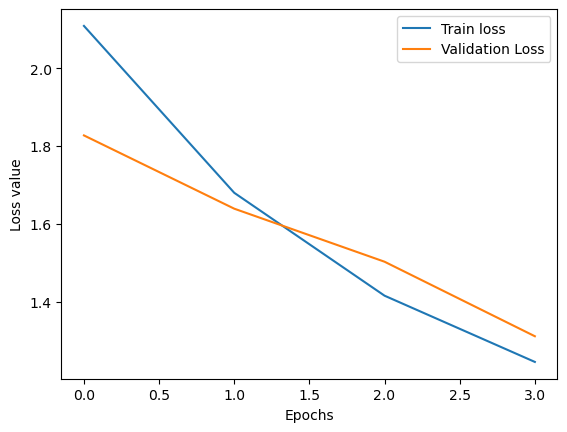

In [14]:
# Q8 - train and val loss
plt.figure()
plt.plot(range(n_epochs), train_loss_list)
plt.plot(range(n_epochs), validation_loss_list)
plt.legend(["Train loss", "Validation Loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss value")
plt.show()

In [15]:
# test
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for data, target in testloader:
        data, target = data.to(DEVICE), target.to(DEVICE)
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += target.size(0)
        n_correct += (predicted == target).sum().item()

    acc = 100.0 * n_correct / n_samples
print("Accuracy on the test set:", acc, "%")

Accuracy on the test set: 54.06 %
